$$
 \textbf{Projects in Machine Learning (ML) and Artificial Intelligence (AI)}
$$

 $$
 \textbf{CSCI 6967}
 $$

 $$
 \textbf{Homework 2}
 $$

## **Task 1 (30 points): Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier. Additionally, do the following:**


---


•
Visualize the decision tree structure for at least three different parameter settings. Comment on how the depth and complexity change the tree.

•
Do some research on what sensitivity analysis is and how it is performed (include citations). Perform a sensitivity analysis to measure the impact of at least two input features on your model's decision boundary.


---



The selected dataset is about a Heart Disease Dataset, while the data was selected from Kaggle:
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data?select=heart_disease_uci.csv

Column Descriptions:
1. age: Age of the patient in years)
2. dataset: origin (place of study)
3. sex: Male/Female
4. cp: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
5. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
6. chol: serum cholesterol in mg/dl
7. fbs: fasting blood sugar (if fasting blood sugar > 120 mg/dl)
8. restecg: resting electrocardiographic results (normal, stt abnormality, lv hypertrophy)
9. thalach: maximum heart rate achieved
10. exang: exercise-induced angina (True/ False)
11. oldpeak: ST depression induced by exercise relative to rest
12. slope: the slope of the peak exercise ST segment
13. ca: number of major vessels (0-3) colored by fluoroscopy
14. thal: maximum heart rate achieved (normal; fixed defect; reversible defect)
15. num: the predicted attribute

From Homework 1, the data were cleaned, and in this code, we convert 'num' to 0 and 1 (disease and no disease). Additionally, the 'id' variable is dropped as it does not play a role in the dataset, serving merely as an identifier for the data population.

In [57]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import accuracy_score
import kagglehub
from google.colab import files

In [58]:
uploaded = files.upload()

Saving cleaned_heart_disease_uci.csv to cleaned_heart_disease_uci (2).csv


In [59]:
df = pd.read_csv('cleaned_heart_disease_uci.csv')

In [60]:
# Basic info about data: such as missing values, its percentages, unique value counts and data types
basic_info = pd.DataFrame({
    "Features": df.columns,
    "Missing Values": df.isnull().sum(),
    "Missing Values[%]": round((df.isnull().sum())/len(df)*100, 1),
    "Unique Counts": df.nunique(),
    "Duplicated Rows": df.duplicated().sum(),
    "Data Types": df.dtypes
})
basic_info

Features  Missing Values  Missing Values[%]  Unique Counts  \
id              id               0                0.0            920   
age            age               0                0.0             50   
sex            sex               0                0.0              2   
dataset    dataset               0                0.0              4   
cp              cp               0                0.0              4   
trestbps  trestbps               0                0.0             66   
chol          chol               0                0.0            222   
fbs            fbs               0                0.0              2   
restecg    restecg               0                0.0              2   
thalch      thalch               0                0.0            124   
exang        exang               0                0.0              2   
oldpeak    oldpeak               0                0.0             58   
slope        slope               0                0.0              3   
ca              ca               0                0.0              4   
thal          thal               0                0.0              2   
num            num               0                0.0              5   

          Duplicated Rows Data Types  
id                      0      int64  
age                     0      int64  
sex                     0      int64  
dataset                 0      int64  
cp                      0      int64  
trestbps                0    float64  
chol                    0    float64  
fbs                     0    float64  
restecg                 0    float64  
thalch                  0    float64  
exang                   0    float64  
oldpeak                 0    float64  
slope                   0    float64  
ca                      0    float64  
thal                    0    float64  
num                     0      int64

In [61]:
# Convert 'num' to binary: 0 if 'num' is 0, and 1 if 'num' is 1, 2, 3, or 4
# This will replace all values of 'num' where the condition df['num'] > 0 is True with 1 (Heart disease), and 0(No disease) otherwise
df['num'] = (df['num'] > 0).astype(int)

In [62]:
df['num']

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: num, Length: 920, dtype: int64

In [63]:
# DataFrame is named df
df = df.drop(['id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int64  
 3   cp        920 non-null    int64  
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    float64
 7   restecg   920 non-null    float64
 8   thalch    920 non-null    float64
 9   exang     920 non-null    float64
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    float64
 12  ca        920 non-null    float64
 13  thal      920 non-null    float64
 14  num       920 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 107.9 KB


**Gini**

In [64]:
# df is the DataFrame with the last column as the target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

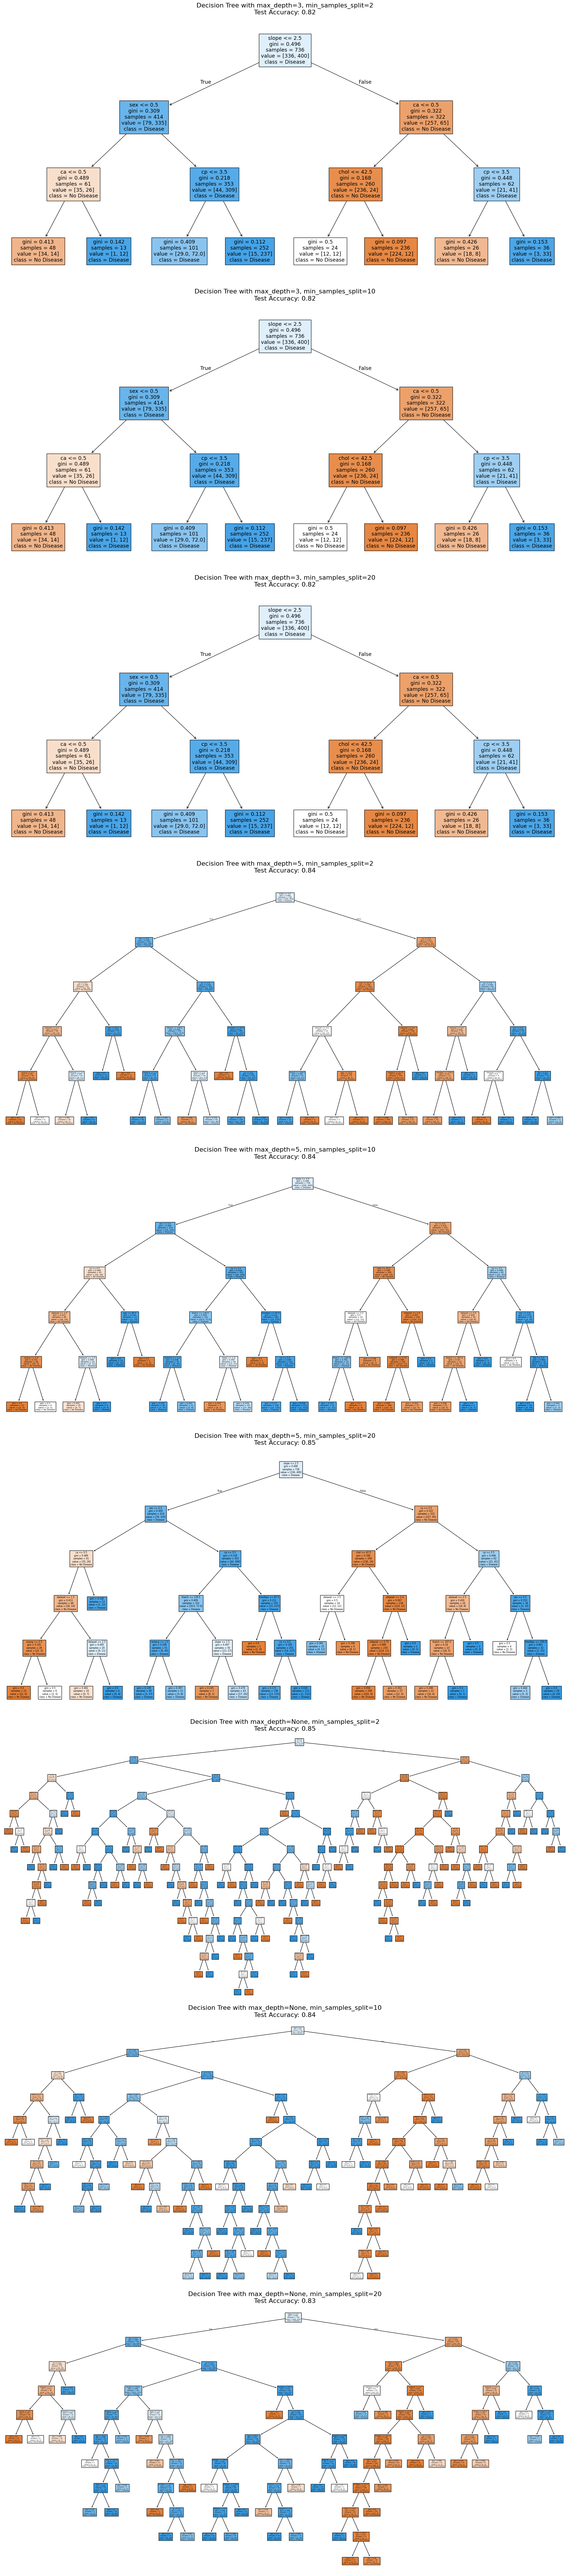

In [65]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Define different settings for max_depth and min_samples_split
depths = [3, 5, None]  # Different maximum depths for the decision trees
min_samples_splits = [2, 10, 20]  # Different min_samples_split values

# Train decision trees and store them
trees = []
configurations = []
accuracies = []

for depth in depths:
    for min_samples in min_samples_splits:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples, random_state=42)
        dt.fit(X_train, y_train)
        trees.append(dt)
        configurations.append((depth, min_samples))

        # Predict on the test set
        y_pred = dt.predict(X_test)

        # Calculate and store accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

# Plot each decision tree and print accuracies
fig, axes = plt.subplots(nrows=len(trees), ncols=1, figsize=(20, 10 * len(trees)))

if len(trees) == 1:
    axes = [axes]  # Wrap in list if only one plot to standardize indexing

for i, tree in enumerate(trees):
    plot_tree(tree, filled=True, ax=axes[i], feature_names=X_train.columns, class_names=['No Disease', 'Disease'])
    axes[i].set_title(f'Decision Tree with max_depth={configurations[i][0]}, min_samples_split={configurations[i][1]}\nTest Accuracy: {accuracies[i]:.2f}', fontsize=16)

plt.tight_layout()
plt.show()

In [66]:
# configurations and accuracies are already populated as shown in previous code
results = pd.DataFrame({
    'Max Depth': [config[0] for config in configurations],
    'Min Samples Split': [config[1] for config in configurations],
    'Test Accuracy': [round(acc, 2) for acc in accuracies]  # Round during list comprehension
})

print(results)

   Max Depth  Min Samples Split  Test Accuracy
0        3.0                  2           0.82
1        3.0                 10           0.82
2        3.0                 20           0.82
3        5.0                  2           0.84
4        5.0                 10           0.84
5        5.0                 20           0.85
6        NaN                  2           0.85
7        NaN                 10           0.84
8        NaN                 20           0.83


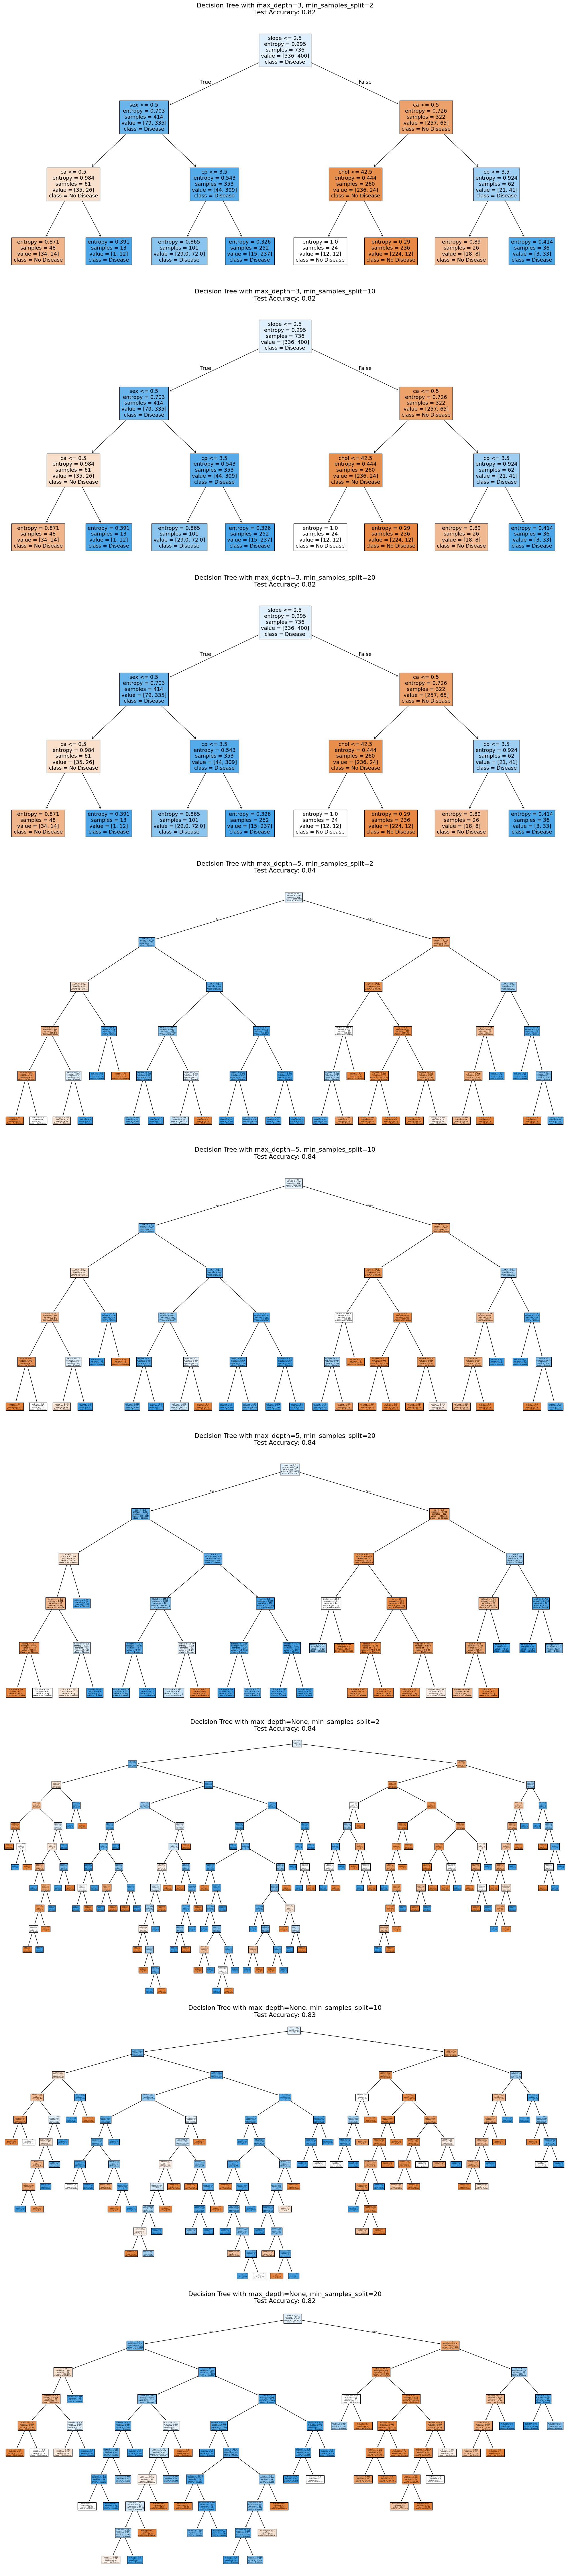

In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Define different settings for max_depth and min_samples_split
depths = [3, 5, None]  # Different maximum depths for the decision trees
min_samples_splits = [2, 10, 20]  # Different min_samples_split values

# Train decision trees and store them
trees = []
configurations = []
accuracies = []

for depth in depths:
    for min_samples in min_samples_splits:
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_split=min_samples, random_state=42)
        dt.fit(X_train, y_train)
        trees.append(dt)
        configurations.append((depth, min_samples))

        # Predict on the test set
        y_pred = dt.predict(X_test)

        # Calculate and store accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

# Plot each decision tree and print accuracies
fig, axes = plt.subplots(nrows=len(trees), ncols=1, figsize=(20, 10 * len(trees)))

if len(trees) == 1:
    axes = [axes]  # Wrap in list if only one plot to standardize indexing

for i, tree in enumerate(trees):
    plot_tree(tree, filled=True, ax=axes[i], feature_names=X_train.columns, class_names=['No Disease', 'Disease'])
    axes[i].set_title(f'Decision Tree with max_depth={configurations[i][0]}, min_samples_split={configurations[i][1]}\nTest Accuracy: {accuracies[i]:.2f}', fontsize=16)

plt.tight_layout()
plt.show()



In [68]:
#configurations and accuracies are already populated
results = pd.DataFrame({
    'Max Depth': [config[0] for config in configurations],
    'Min Samples Split': [config[1] for config in configurations],
    'Test Accuracy': [round(acc, 2) for acc in accuracies]  # Round during list comprehension
})

print(results)

   Max Depth  Min Samples Split  Test Accuracy
0        3.0                  2           0.82
1        3.0                 10           0.82
2        3.0                 20           0.82
3        5.0                  2           0.84
4        5.0                 10           0.84
5        5.0                 20           0.84
6        NaN                  2           0.84
7        NaN                 10           0.83
8        NaN                 20           0.82


<div style="text-align: justify;">

Overall, it doesn't matter which ASM is chosen, as the range of accuracy results with Gini is 0.82-0.85, while with entropy it is 0.82-0.84. Therefore, the comments apply to both ASMs.

Changes in max depth and min samples split minimally impact the model's accuracy, suggesting that max depth may not be critical for this dataset. This could be true if the dataset lacks complexity or if its features don't benefit from deeper trees. While a slight accuracy improvement at a max depth of 5 suggests some advantages in capturing nuanced data patterns, further increases in depth show diminishing returns. Moreover, allowing the tree to grow without bounds can lead to overfitting, where the model becomes overly complex and sensitive to noise in the training data rather than capturing genuine data patterns. This underscores the importance of optimizing hyperparameters to suit the data's specific characteristics, where moderate settings might suffice to balance model accuracy and complexity, preventing overfitting while maintaining good generalization to new data.

**Sensitivity Analysis**

Sensitivity analysis is a method used to assess how variations in input variables of a model affect its output, crucial for verifying model reliability and identifying key influential factors. It can be conducted locally, where changes in a few inputs are analyzed near nominal values, or globally, covering a broader range of inputs. Common methods include One-at-a-Time (OAT) analysis, where one variable is altered while others are held constant, and variance-based methods like Sobol indices that measure input contributions to output variance. In machine learning, sensitivity analysis often involves grid-based techniques to visualize the effect of feature variations on predictions, exemplified by adjusting two features across a grid while maintaining others at mean values to understand their impact on model decisions (Saltelli et al., 2008, Global Sensitivity Analysis: The Primer, John Wiley & Sons). This approach helps in fine-tuning models and improving their predictive accuracy by pinpointing critical input features.

To perform a sensitivity analysis that measures the impact of at least two input features, we must first select these features. In decision trees, feature importance is typically calculated based on the reduction in impurity. Essentially, the more an attribute is used to make key splits that improve the purity of node subsets, the higher its relative importance. Based on this metric, and considering the latest decision tree where information gain is utilized, 'slope' and 'ca' have been selected for the sensitivity analysis due to their significant roles in the model's decisions.

In [69]:
# After training the decision tree
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


     Feature  Importance
11     slope    0.371124
12        ca    0.147493
3         cp    0.090734
5       chol    0.087923
1        sex    0.070844
10   oldpeak    0.057184
2    dataset    0.052586
8     thalch    0.051154
0        age    0.025522
4   trestbps    0.024703
9      exang    0.013889
13      thal    0.006843
6        fbs    0.000000
7    restecg    0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


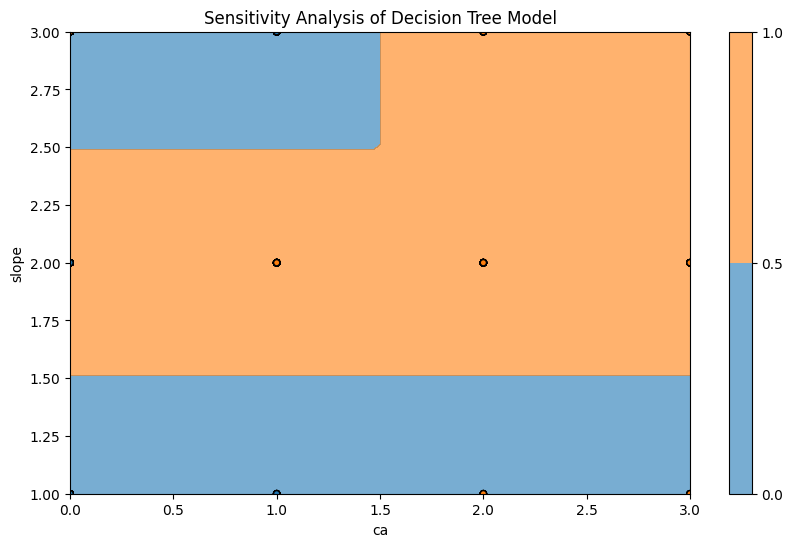

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Train your decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Select two features for the sensitivity analysis
feature_1 = 'ca'  # replace with your actual feature name
feature_2 = 'slope'  # replace with your actual feature name

# Create a grid of values for feature_1 and feature_2
feature_1_range = np.linspace(X_train[feature_1].min(), X_train[feature_1].max(), 50)
feature_2_range = np.linspace(X_train[feature_2].min(), X_train[feature_2].max(), 50)
xx, yy = np.meshgrid(feature_1_range, feature_2_range)

# Prepare other feature values fixed at their mean values
feature_values = X_train.mean().to_numpy()
feature_indices = {col: i for i, col in enumerate(X_train.columns)}
X_grid = np.tile(feature_values, (xx.size, 1))

# Replace the values of the two features in the grid with all combinations
X_grid[:, feature_indices[feature_1]] = xx.ravel()
X_grid[:, feature_indices[feature_2]] = yy.ravel()

# Predict using the trained model
predictions = clf.predict(X_grid).reshape(xx.shape)

from matplotlib.colors import ListedColormap

# Assuming the 'predictions' array holds class labels 0 or 1
cmap = ListedColormap(['#1f77b4', '#ff7f0e'])  # Blue to orange for classes 0 and 1

plt.figure(figsize=(10, 6))
# Set vmax to 1 to limit the color range
contour = plt.contourf(xx, yy, predictions, alpha=0.6, cmap=cmap, levels=np.array([0, 0.5, 1]), vmax=1)
plt.colorbar(contour, ticks=[0, 0.5, 1])
plt.scatter(X_train[feature_1], X_train[feature_2], c=y_train, cmap=cmap, edgecolor='k', s=20)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Sensitivity Analysis of Decision Tree Model')
plt.show()

The sensitivity analysis plot above visualizes how the features ca (number of major vessels colored by fluoroscopy) and slope (slope of the peak exercise ST segment) influence the predictions of a decision tree model. The plot indicates regions where changes in ca and slope lead to different model predictions: the blue area signifies a lower risk prediction, while the orange area indicates higher risk predictions. The presence of a blue dot in an orange region highlights an exception where, despite the typical higher risk associated with that region's parameter values, the prediction is of lower risk, suggesting that other factors or an anomaly in the data might be influencing this outcome. This plot effectively demonstrates the utility of ca and slope in discriminating risk levels, affirming their importance in the model.

# **Task 2 (30 points): From the Bagging and Boosting ensemble methods pick any one algorithm from each category. Implement both the algorithms using the same data.**




---


•Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15). You may do your own research on this technique (include citations).

•Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy, Precision, F1-score etc.).

•Comment on the behavior of each algorithm under the metrics. Does the performance ranking change based on the metric used? Why?**


---



In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.datasets import load_iris  # Example dataset

In [72]:
# 'num' is the column i want to predict
X = df.drop('num', axis=1)  # Drop the 'num' column to create the feature set
y = df['num']  # Use the 'num' column as the target variable

#  perform a train-test split (useful for a final test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
def evaluate_model(clf, X, y, folds):
    skf = StratifiedKFold(n_splits=folds)
    accuracies = []
    precisions = []
    f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        accuracies.append(accuracy_score(y_test, predictions))
        precisions.append(precision_score(y_test, predictions, average='macro'))
        f1_scores.append(f1_score(y_test, predictions, average='macro'))

    # Calculate mean and standard deviation
    accuracy_mean, accuracy_std = np.mean(accuracies), np.std(accuracies)
    precision_mean, precision_std = np.mean(precisions), np.std(precisions)
    f1_score_mean, f1_score_std = np.mean(f1_scores), np.std(f1_scores)

    print(f"Accuracy: Mean = {accuracy_mean:.2f}, Std = {accuracy_std:.2f}")
    print(f"Precision: Mean = {precision_mean:.2f}, Std = {precision_std:.2f}")
    print(f"F1-Score: Mean = {f1_score_mean:.2f}, Std = {f1_score_std:.2f}")

    return accuracies, precisions, f1_scores, accuracy_std, precision_std, f1_score_std


In [74]:
# Example fold counts
fold_counts = [5, 10, 15]

# Example of evaluating Random Forest and AdaBoost with 5, 10, 15 folds
results = {}
for model, clf in zip(['Random Forest', 'AdaBoost'], [RandomForestClassifier(n_estimators=100, random_state=42), AdaBoostClassifier(n_estimators=100, random_state=42)]):
    model_results = {}
    for folds in fold_counts:
        print(f"Evaluating {model} with {folds} folds:")
        model_results[folds] = evaluate_model(clf, X_train, y_train, folds=folds)
    results[model] = model_results


Evaluating Random Forest with 5 folds:
Accuracy: Mean = 0.88, Std = 0.02
Precision: Mean = 0.88, Std = 0.02
F1-Score: Mean = 0.88, Std = 0.02
Evaluating Random Forest with 10 folds:
Accuracy: Mean = 0.88, Std = 0.05
Precision: Mean = 0.89, Std = 0.05
F1-Score: Mean = 0.88, Std = 0.05
Evaluating Random Forest with 15 folds:
Accuracy: Mean = 0.90, Std = 0.04
Precision: Mean = 0.90, Std = 0.04
F1-Score: Mean = 0.89, Std = 0.04
Evaluating AdaBoost with 5 folds:
Accuracy: Mean = 0.87, Std = 0.02
Precision: Mean = 0.87, Std = 0.02
F1-Score: Mean = 0.87, Std = 0.02
Evaluating AdaBoost with 10 folds:
Accuracy: Mean = 0.88, Std = 0.04
Precision: Mean = 0.88, Std = 0.04
F1-Score: Mean = 0.88, Std = 0.04
Evaluating AdaBoost with 15 folds:
Accuracy: Mean = 0.89, Std = 0.04
Precision: Mean = 0.90, Std = 0.03
F1-Score: Mean = 0.89, Std = 0.04


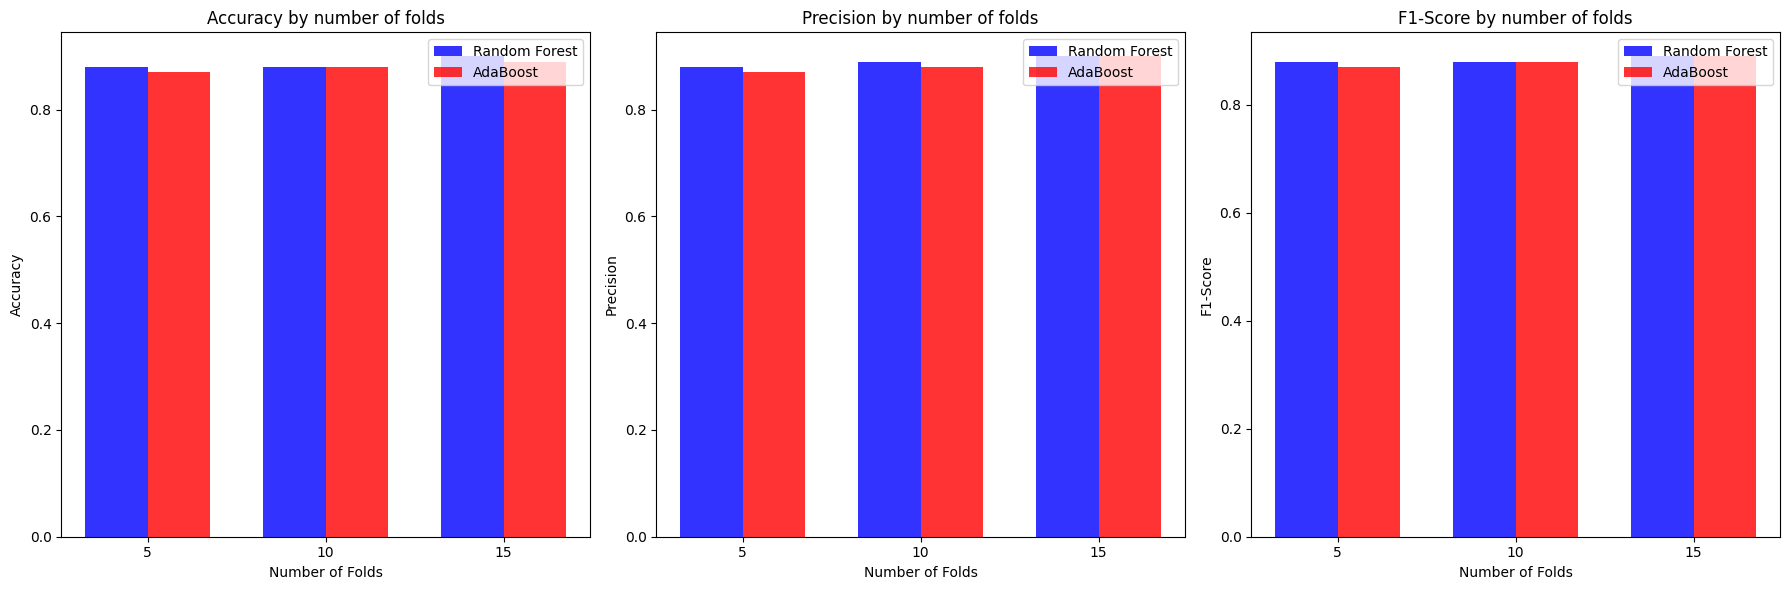

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (you should replace these with your actual results)
metrics = {
    'Random Forest': {
        5: {'Accuracy': 0.88, 'Precision': 0.88, 'F1-Score': 0.88},
        10: {'Accuracy': 0.88, 'Precision': 0.89, 'F1-Score': 0.88},
        15: {'Accuracy': 0.90, 'Precision': 0.90, 'F1-Score': 0.89}
    },
    'AdaBoost': {
        5: {'Accuracy': 0.87, 'Precision': 0.87, 'F1-Score': 0.87},
        10: {'Accuracy': 0.88, 'Precision': 0.88, 'F1-Score': 0.88},
        15: {'Accuracy': 0.89, 'Precision': 0.90, 'F1-Score': 0.89}
    }
}

# Metrics to plot
metric_names = ['Accuracy', 'Precision', 'F1-Score']
n_groups = len(fold_counts)

# Create plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metric_names):
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    # Random Forest bars
    rf_means = [metrics['Random Forest'][folds][metric] for folds in fold_counts]
    rects1 = ax[i].bar(index, rf_means, bar_width,
                       alpha=opacity, color='b',
                       label='Random Forest')

    # AdaBoost bars
    ab_means = [metrics['AdaBoost'][folds][metric] for folds in fold_counts]
    rects2 = ax[i].bar(index + bar_width, ab_means, bar_width,
                       alpha=opacity, color='r',
                       label='AdaBoost')

    ax[i].set_xlabel('Number of Folds')
    ax[i].set_ylabel(metric)
    ax[i].set_title(f'{metric} by number of folds')
    ax[i].set_xticks(index + bar_width / 2)
    ax[i].set_xticklabels([str(folds) for folds in fold_counts])
    ax[i].legend()

plt.tight_layout()
plt.show()


The evaluation results for Random Forest and AdaBoost using stratified k-fold cross-validation reveal marginal improvements in accuracy, precision, and F1-score as the number of folds increases from 5 to 15. While Random Forest's standard deviation in metrics increases with more folds, indicating sensitivity to data partitioning, AdaBoost maintains more consistent performance across different splits. Despite these slight variations, both algorithms perform comparably across all metrics. However, Random Forest generally outperforms AdaBoost in most cases, though the differences are not substantial. This suggests that while Random Forest may handle certain aspects of the modeling slightly better, both algorithms are robust choices for this dataset.

# **Task 3 (40 points): Compare the effectiveness of the three models implemented above. Analyze the results using the following**



---
• A confusion matrix for one selected test fold.

• A statistical test (e.g., paired t-test) to determine if differences between models are significant.

• A discussion on the trade-off between bias and variance for each model.


---




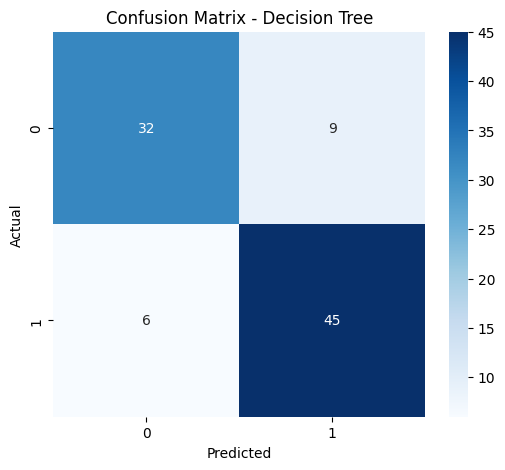

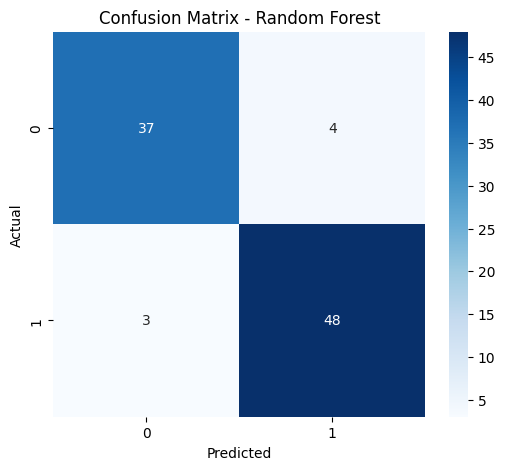

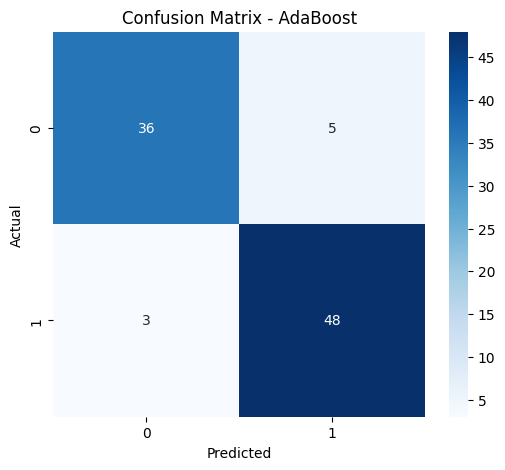

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming the initialization of StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
folds = list(skf.split(X, y))  # Create a list of train-test tuples

# Select the 10th fold
train_index, test_index = folds[9]  # Indexing starts at 0, so the 10th fold is at index 9

X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

# Initialize and fit models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Generate confusion matrices and plot them
for name, model in models.items():
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [77]:
from scipy.stats import ttest_rel

# Collect accuracy scores for each fold and model
# Assuming accuracy_scores is a dictionary holding these scores
accuracy_scores = {
    'Decision Tree': [],
    'Random Forest': [],
    'AdaBoost': []
}

# Re-run the cross-validation to collect accuracy scores
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    for name, model in models.items():
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)
        accuracy = accuracy_score(y_test_fold, y_pred)
        accuracy_scores[name].append(accuracy)

# Perform paired t-tests between the models
dt_rf_t_stat, dt_rf_p_value = ttest_rel(accuracy_scores['Decision Tree'], accuracy_scores['Random Forest'])
dt_ab_t_stat, dt_ab_p_value = ttest_rel(accuracy_scores['Decision Tree'], accuracy_scores['AdaBoost'])
rf_ab_t_stat, rf_ab_p_value = ttest_rel(accuracy_scores['Random Forest'], accuracy_scores['AdaBoost'])

print(f"Decision Tree vs Random Forest: t-stat = {dt_rf_t_stat}, p-value = {dt_rf_p_value}")
print(f"Decision Tree vs AdaBoost: t-stat = {dt_ab_t_stat}, p-value = {dt_ab_p_value}")
print(f"Random Forest vs AdaBoost: t-stat = {rf_ab_t_stat}, p-value = {rf_ab_p_value}")


Decision Tree vs Random Forest: t-stat = -6.5764550996557665, p-value = 0.00010200547064106742
Decision Tree vs AdaBoost: t-stat = -4.121978054236203, p-value = 0.002590287434238222
Random Forest vs AdaBoost: t-stat = 1.8708286933869709, p-value = 0.09417408579146237


The confusion matrices for the Decision Tree, Random Forest, and AdaBoost models show varying degrees of performance with the Decision Tree having more false positives and false negatives compared to the other two models. Statistical tests, such as the paired t-tests, indicate significant differences between the Decision Tree and the other two models: Random Forest and AdaBoost, with p-values well below the 0.05 threshold, suggesting that the differences in their performance are statistically significant. The comparison between Random Forest and AdaBoost, however, yields a p-value of 0.094, indicating no significant difference in their performances. This suggests that while Random Forest and AdaBoost offer more robust predictions compared to the Decision Tree, they perform similarly to each other. This analysis illustrates the trade-off between bias and variance, where Decision Trees, typically high-variance models, might overfit compared to the ensemble approaches of Random Forest and AdaBoost which generally achieve better balance, leading to improved prediction accuracy and model generalizability.

# **Task (50 points): For the same classification problem solved above, implement the XGBoost algorithm. If you picked XGBoost as one of the boosting algorithms in task 2, you may use the same implementation. Implement and evaluate XGBoost with the following requirements**



---
1.
Perform a grid search or random search over at least 3 hyperparameters, such as learning rate, max depth, and subsample.

2.
Analyze the sensitivity of your model to changes in these parameters.

3.
Optional (no points taken off if not done) - Create plots to show the effect of each parameter on accuracy and another metric.


---




In [82]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

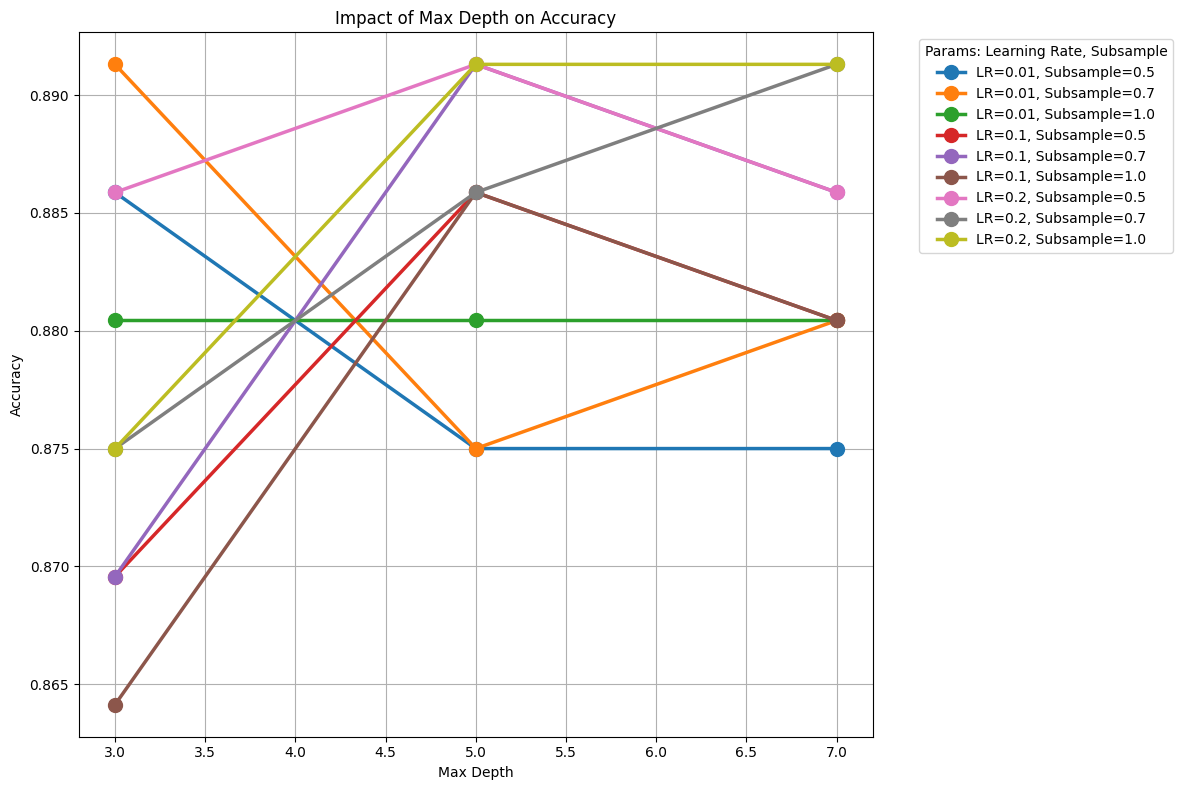

In [83]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data setup
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters
learning_rates = [0.01, 0.1, 0.2]
max_depths = [3, 5, 7,]
subsamples = [0.5, 0.7, 1.0]

# Store results
results = {'learning_rate': [], 'max_depth': [], 'subsample': [], 'accuracy': []}

# Model training and evaluation
for lr in learning_rates:
    for depth in max_depths:
        for subsample in subsamples:
            model = xgb.XGBClassifier(learning_rate=lr, max_depth=depth, subsample=subsample, tree_method='auto')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Append results
            results['learning_rate'].append(lr)
            results['max_depth'].append(depth)
            results['subsample'].append(subsample)
            results['accuracy'].append(accuracy)

# Convert results to DataFrame
sensitivity_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 8))
for lr in sensitivity_df['learning_rate'].unique():
    for subsample in sensitivity_df['subsample'].unique():
        subset = sensitivity_df[(sensitivity_df['learning_rate'] == lr) & (sensitivity_df['subsample'] == subsample)]
        plt.plot(subset['max_depth'], subset['accuracy'], label=f'LR={lr}, Subsample={subsample}',
                 marker='o', markersize=10, linestyle='-', linewidth=2.5)

plt.title('Impact of Max Depth on Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(title='Params: Learning Rate, Subsample', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


The plot illustrates the sensitivity of the XGBoost model's accuracy to varying max depths across different learning rates and subsample values, demonstrating a diverse range of responses. It is evident that as the max depth increases, the model's accuracy does not consistently improve, suggesting a complex interaction between these parameters and the model's ability to generalize. For instance, some configurations, such as a higher learning rate with a lower subsample, exhibit an initial increase in accuracy that later stabilizes or decreases, indicating a possible overfitting at greater depths. In contrast, other settings maintain a more stable accuracy across depths, which may point to a better balance between bias and variance. These observations underscore the importance of tuning hyperparameters meticulously, as the optimal settings can vary significantly depending on the characteristics of the data and the specific model configuration.